# Challenge I

In [2]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous ajoutons une contribution de cdt. Nous avons choisi de donner la valeur 2 à c.
$$
dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

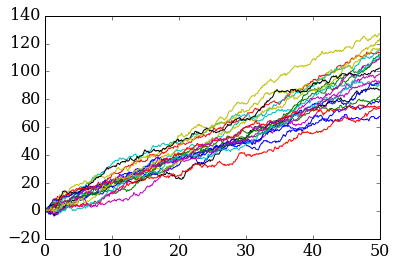

In [3]:
T=50.0
c=2.0
nt=500
dt=T/nt
alpha=2.0
npart=100000

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])
x[0]=0


for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

Nous remarquons que les particules ont toutes subies un déplacement latéral dans la même direction. C'est le comportement attendu lorsqu'à chaque itération, une contribution cdt est ajoutée au déplacement de la particule. La somme totale des contributions pour chaque particule est égal à $c*dt*nt$. 

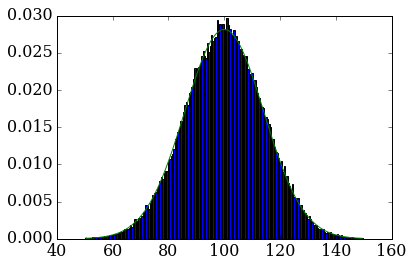

In [4]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(50,150,binwidth)
bins = bins + binwidth/2

sigma = 1.0

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*dt*nt)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

De base, la densité est:
$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu_t)^2}{2\sigma_t^2}}
$$
Après ajout de cdt au déplacement, la moyenne est augmentée de cdnt mais l'écart-type ne varie pas
$c*dt*nt$

# Challenge II

Nous ajoutons une contribution de $-\gamma\,x\,dt$. Nous avons choisi de donner la valeur 2 à $\gamma$.
$$
dx=-\gamma\,x\,dt+\sqrt{2\alpha dt}\cal{N(0,1)}
$$

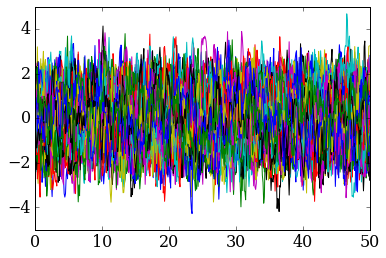

In [20]:
T=50
gamma=2.0
nt=500
dt=T/nt
alpha=2.0
npart=100000

t = numpy.arange(0,T+dt,dt)
y = numpy.empty([nt+1,npart])
y[0]=0


for i in range(nt):
    y[i+1]=y[i]-gamma*y[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(100):
    pyplot.plot(t,y[:,i])

Nous voyons que les particules restent dans l'intervalle $[-4,4]$. Ceci est évidement attendu étant donné que le frottement ramène la particule vers sa position initiale.

Remarque: en augmentant la valeur de $\gamma$, les particules sont plus rapidement ramenées à l'origine. D'un autre coté, des valeurs négatives de $\gamma$ repoussent les particules à chaque déplacement.

Ci-dessous, pour un temps tendant vers l'infini (500 dans notre cas à cause des limitations de calcul de la machine), nous constatons que le comportement est identique à celui précédement observé. Les particules sont dans un état stationnaire, coincées dans un intervalle centré sur l'origine.

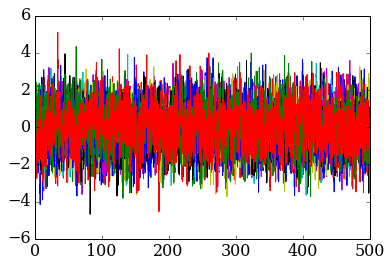

In [21]:
T=500
nt=5000
dt=T/nt

t = numpy.arange(0,T+dt,dt)
y = numpy.empty([nt+1,npart])
y[0]=0


for i in range(nt):
    y[i+1]=y[i]-gamma*y[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(10):
    pyplot.plot(t,y[:,i])

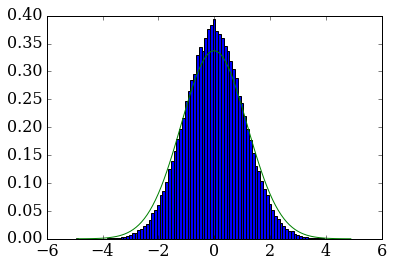

In [23]:
# Generate bins centered around 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

sigma = 1.0

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(y[nt],bins,normed=True);

sigmat2=2*alpha*dt+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))

Une gaussienne de moyenne nulle et de variance $\sigma^2_t = 2\alpha t + \sigma^2$ ne correspond pas exactement à l'histogramme affiché. Nous pensons qu'il y a une contribution négative à $\sigma_t$ que nous n'arrivons pas à déterminer.